In [120]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Considering crimes which were reported in 2016 but have crime occurrence date from 01/01/2015 

In [55]:
crimes = pd.read_csv("C:\Users\Vishwajeet\Documents\Python Scripts\Homeless\VYS217\Data_vys217\\
Crime\NYPD_Complaint_Data_Current_YTD.csv")

In [56]:
crimes.columns

Index([u'CMPLNT_NUM', u'CMPLNT_FR_DT', u'CMPLNT_FR_TM', u'CMPLNT_TO_DT',
       u'CMPLNT_TO_TM', u'RPT_DT', u'KY_CD', u'OFNS_DESC', u'PD_CD',
       u'PD_DESC', u'CRM_ATPT_CPTD_CD', u'LAW_CAT_CD', u'JURIS_DESC',
       u'BORO_NM', u'ADDR_PCT_CD', u'LOC_OF_OCCUR_DESC', u'PREM_TYP_DESC',
       u'PARKS_NM', u'HADEVELOPT', u'X_COORD_CD', u'Y_COORD_CD', u'Latitude',
       u'Longitude', u'Lat_Lon'],
      dtype='object')

In [57]:
crimes.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,736216184,09/30/2016,23:25:00,09/30/2016,23:25:00,09/30/2016,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,42.0,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1015308.0,244373.0,40.837376,-73.887761,"(40.837376359, -73.887760929)"
1,294332956,09/30/2016,23:16:00,09/30/2016,23:21:00,09/30/2016,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,71.0,OPPOSITE OF,STREET,NaN,NaN,997932.0,180172.0,40.661205,-73.950687,"(40.661204871, -73.950686652)"
2,852981427,09/30/2016,23:00:00,09/30/2016,23:05:00,09/30/2016,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",...,43.0,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,CASTLE HILL,1025580.0,236918.0,40.816872,-73.850685,"(40.816872438, -73.850684927)"
3,369976063,09/30/2016,23:00:00,NaN,NaN,09/30/2016,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,...,103.0,NaN,STREET,NaN,NaN,1038464.0,192970.0,40.696177,-73.804492,"(40.696177006, -73.804492266)"
4,117213771,09/30/2016,23:00:00,09/30/2016,23:10:00,09/30/2016,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",...,110.0,FRONT OF,STREET,NaN,NaN,1016301.0,209428.0,40.741458,-73.884339,"(40.741458245, -73.884339073)"


# File containing meaning of column names/

In [58]:
desc = pd.read_csv("C:\Users\Vishwajeet\Documents\Python Scripts\Homeless\VYS217\Data_vys217\\
Crime\NYPD_Incident_Level_Data_Column_Descriptions.csv")

In [59]:
desc

,Column,Description
0,CMPLNT_NUM,Randomly generated persistent ID for each comp...
1,CMPLNT_FR_DT,Exact date of occurrence for the reported even...
2,CMPLNT_FR_TM,Exact time of occurrence for the reported even...
3,CMPLNT_TO_DT,Ending date of occurrence for the reported eve...
4,CMPLNT_TO_TM,Ending time of occurrence for the reported eve...
5,RPT_DT,Date event was reported to police
6,KY_CD,Three digit offense classification code
7,OFNS_DESC,Description of offense corresponding with key ...
8,PD_CD,Three digit internal classification code (more...
9,PD_DESC,Description of internal classification corresp...


# Taking required columns from crime dataset

In [60]:
crimes = crimes[['CMPLNT_NUM','CMPLNT_FR_DT','RPT_DT', 'Latitude','Longitude']]

In [61]:
crimes.head()

,CMPLNT_NUM,CMPLNT_FR_DT,RPT_DT,Latitude,Longitude
0,736216184,09/30/2016,09/30/2016,40.837376,-73.887761
1,294332956,09/30/2016,09/30/2016,40.661205,-73.950687
2,852981427,09/30/2016,09/30/2016,40.816872,-73.850685
3,369976063,09/30/2016,09/30/2016,40.696177,-73.804492
4,117213771,09/30/2016,09/30/2016,40.741458,-73.884339


In [62]:
crimes.CMPLNT_FR_DT = pd.to_datetime(crimes.CMPLNT_FR_DT, errors = 'coerce')
crimes.RPT_DT = pd.to_datetime(crimes.RPT_DT, errors = 'coerce')

In [63]:
crimes.dtypes

CMPLNT_NUM               int64
CMPLNT_FR_DT    datetime64[ns]
RPT_DT          datetime64[ns]
Latitude               float64
Longitude              float64
dtype: object

In [65]:
crimes.RPT_DT.describe()

count                  361740
unique                    274
top       2016-06-21 00:00:00
freq                     1598
first     2016-01-01 00:00:00
last      2016-09-30 00:00:00
Name: RPT_DT, dtype: object

In [64]:
crimes.CMPLNT_FR_DT.describe()

count                  361721
unique                   1499
top       2016-01-01 00:00:00
freq                     2077
first     1912-11-16 00:00:00
last      2016-09-30 00:00:00
Name: CMPLNT_FR_DT, dtype: object

In [74]:
crimes.shape
# crimes.dropna(inplace=True)
# crimes.shape

(361739, 5)

In [75]:
crimes = crimes[crimes.CMPLNT_FR_DT >= '2015-01-01']

In [76]:
crimes.shape

(360096, 5)

In [77]:
crimes.CMPLNT_FR_DT.describe()

count                  360096
unique                    639
top       2016-01-01 00:00:00
freq                     2077
first     2015-01-01 00:00:00
last      2016-09-30 00:00:00
Name: CMPLNT_FR_DT, dtype: object

In [78]:
crimes[crimes.CMPLNT_FR_DT.isnull()]

,CMPLNT_NUM,CMPLNT_FR_DT,RPT_DT,Latitude,Longitude


In [82]:
crimes[crimes.RPT_DT.isnull()]

,CMPLNT_NUM,CMPLNT_FR_DT,RPT_DT,Latitude,Longitude


In [83]:
crimes[crimes.CMPLNT_NUM.isnull()]

,CMPLNT_NUM,CMPLNT_FR_DT,RPT_DT,Latitude,Longitude


In [84]:
len(crimes[crimes.Latitude.isnull()])

5420

In [85]:
crimes.shape

(360096, 5)

In [86]:
crimes.dropna(inplace=True)

C:\Users\Vishwajeet\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [87]:
crimes.shape

(354676, 5)

# Export Crime file

In [89]:
crimes.to_csv('C:\Users\Vishwajeet\Documents\Python Scripts\Homeless\VYS217\Data_vys217\Crime\intermittent\crimes_export.csv')

# The exported file is used to spacially join the dataset to zipcodes in ArcGIS and import the shape filw with the crimes data summarised in zipcodes 

In [90]:
crime_zipcode = gp.read_file("C:\Users\Vishwajeet\Documents\Python Scripts\Homeless\VYS217\Data_vys217\Crime\intermittent\Crimes_Zips\Crimes_zip.shp")

In [92]:
crime_zipcode = crime_zipcode[['ZIPCODE','Count_']]

In [93]:
crime_zipcode[crime_zipcode.ZIPCODE.duplicated()]

,ZIPCODE,Count_
19,10463,568
27,10464,0
28,10464,148
109,10004,0
113,10004,0
114,10004,0
123,11231,0
144,11096,5
146,11693,0
149,11693,777


In [94]:
crime_zipcode.sort_values(['ZIPCODE','Count_'], ascending= False, inplace= True)

C:\Users\Vishwajeet\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [95]:
crime_zipcode.reset_index(inplace= True)

In [96]:
crime_zipcode.drop(['index'], axis=1, inplace=True)

C:\Users\Vishwajeet\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [97]:
crime_zipcode = crime_zipcode.groupby('ZIPCODE').sum()

In [101]:
crime_zipcode = crime_zipcode[crime_zipcode.index >= '10000']

In [103]:
crime_zipcode.reset_index(inplace=True)

In [105]:
crime_zipcode.columns = ['zip_code','crime_count']

In [106]:
crime_zipcode

,zip_code,crime_count
0,10001,4404
1,10002,4145
2,10003,3397
3,10004,453
4,10005,285
5,10006,242
6,10007,985
7,10009,2408
8,10010,1530
9,10011,3185


# Export final crime counts

In [108]:
crime_zipcode.to_csv('C:\Users\Vishwajeet\Documents\Python Scripts\Homeless\VYS217\Data_vys217\Crime\intermittent\crimes_counts.csv')

# Plot

(0, 5)

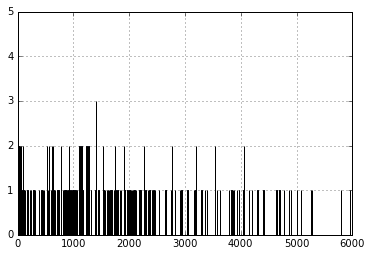

In [132]:
crime_zipcode.crime_count.hist(bins=1000)
plt.ylim(0,5)